In [6]:
import pandas as pd
import os

user_home = os.path.expanduser("~")
root_path = os.path.dirname(user_home)
print(root_path)

# dataset_pt1 = pd.read_csv("C:/Users/dannt/Documents/GitHub/PSDI-miscibility2/Datasets/TrainTestData/Dragon/LogTrain1.csv")
# dataset_pt2 = pd.read_csv("C:/Users/dannt/Documents/GitHub/PSDI-miscibility2/Datasets/TrainTestData/Dragon/LogTrain1.csv")
# dataset_pt3 = pd.read_csv("C:/Users/dannt/Documents/GitHub/PSDI-miscibility2/Datasets/TrainTestData/Dragon/LogTrain1.csv")
# y1 = dataset_pt1['MoleFraction']
# y2 = dataset_pt2['MoleFraction']
# y3 = dataset_pt3['MoleFraction']
# X1 = dataset_pt1.iloc[:, 7:]
# X2 = dataset_pt2.iloc[:, 7:]
# X3 = dataset_pt3.iloc[:, 7:]

# y = pd.concat([y1, y2, y3], axis=0).reset_index(drop=True)
# X = pd.concat([X1, X2, X3], axis=0).reset_index(drop=True)
# dataset = pd.concat([dataset_pt1, dataset_pt2, dataset_pt3], axis=0).reset_index(drop=True)

# Without Dragon
dataset = pd.read_csv("C:/Users/dannt/Documents/GitHub/PSDI-miscibility2/Datasets/TrainTestData/Augmented/Gamma/NoDragon/QuantileMinMaxTrain.csv")
y = dataset['MoleFraction']
X = dataset.iloc[:, 7:]


X.describe()

C:\Users


,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,RotatableBondCount,HeavyAtomCount,Volume3D,XStericQuadrupole3D,YStericQuadrupole3D,...,NOCount,NumHAcceptors,NumHeteroatoms,NumRotatableBonds,RingCount,MolLogP,MolMR,MW,AMW,Sv
count,55138.000000,55138.000000,55138.000000,55138.000000,55138.000000,55138.000000,55138.000000,55138.000000,55138.000000,55138.000000,...,55138.000000,55138.000000,55138.000000,55138.000000,55138.000000,55138.000000,55138.000000,55138.000000,55138.000000,55138.000000
mean,0.500237,0.499118,0.499024,0.497353,0.497989,0.499801,0.497323,0.497175,0.498506,0.499268,...,0.498512,0.499111,0.499498,0.499018,0.501174,0.500346,0.498504,0.498737,0.501223,0.498269
std,0.094973,0.095894,0.095716,0.098179,0.096258,0.097110,0.096563,0.096755,0.092381,0.097295,...,0.093976,0.094575,0.096000,0.095795,0.089844,0.093843,0.095948,0.096126,0.099270,0.096449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.169254,0.000000,0.000000,0.000000,0.000000
25%,0.437167,0.435213,0.435213,0.429337,0.433538,0.446019,0.435061,0.434149,0.436268,0.433691,...,0.462906,0.444886,0.443887,0.446724,0.451169,0.438494,0.435297,0.433996,0.434149,0.434917
50%,0.498432,0.498187,0.498905,0.496138,0.496863,0.500483,0.502655,0.496259,0.498190,0.501327,...,0.462906,0.504345,0.498432,0.502655,0.451169,0.498690,0.497225,0.497707,0.500603,0.496380
75%,0.565699,0.562345,0.562972,0.564032,0.563882,0.556399,0.565090,0.561076,0.559729,0.564939,...,0.557838,0.547327,0.565090,0.560168,0.583474,0.563064,0.563061,0.563548,0.568104,0.563581
max,1.000000,1.000000,1.000000,0.832194,1.000000,1.000000,1.000000,0.859179,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


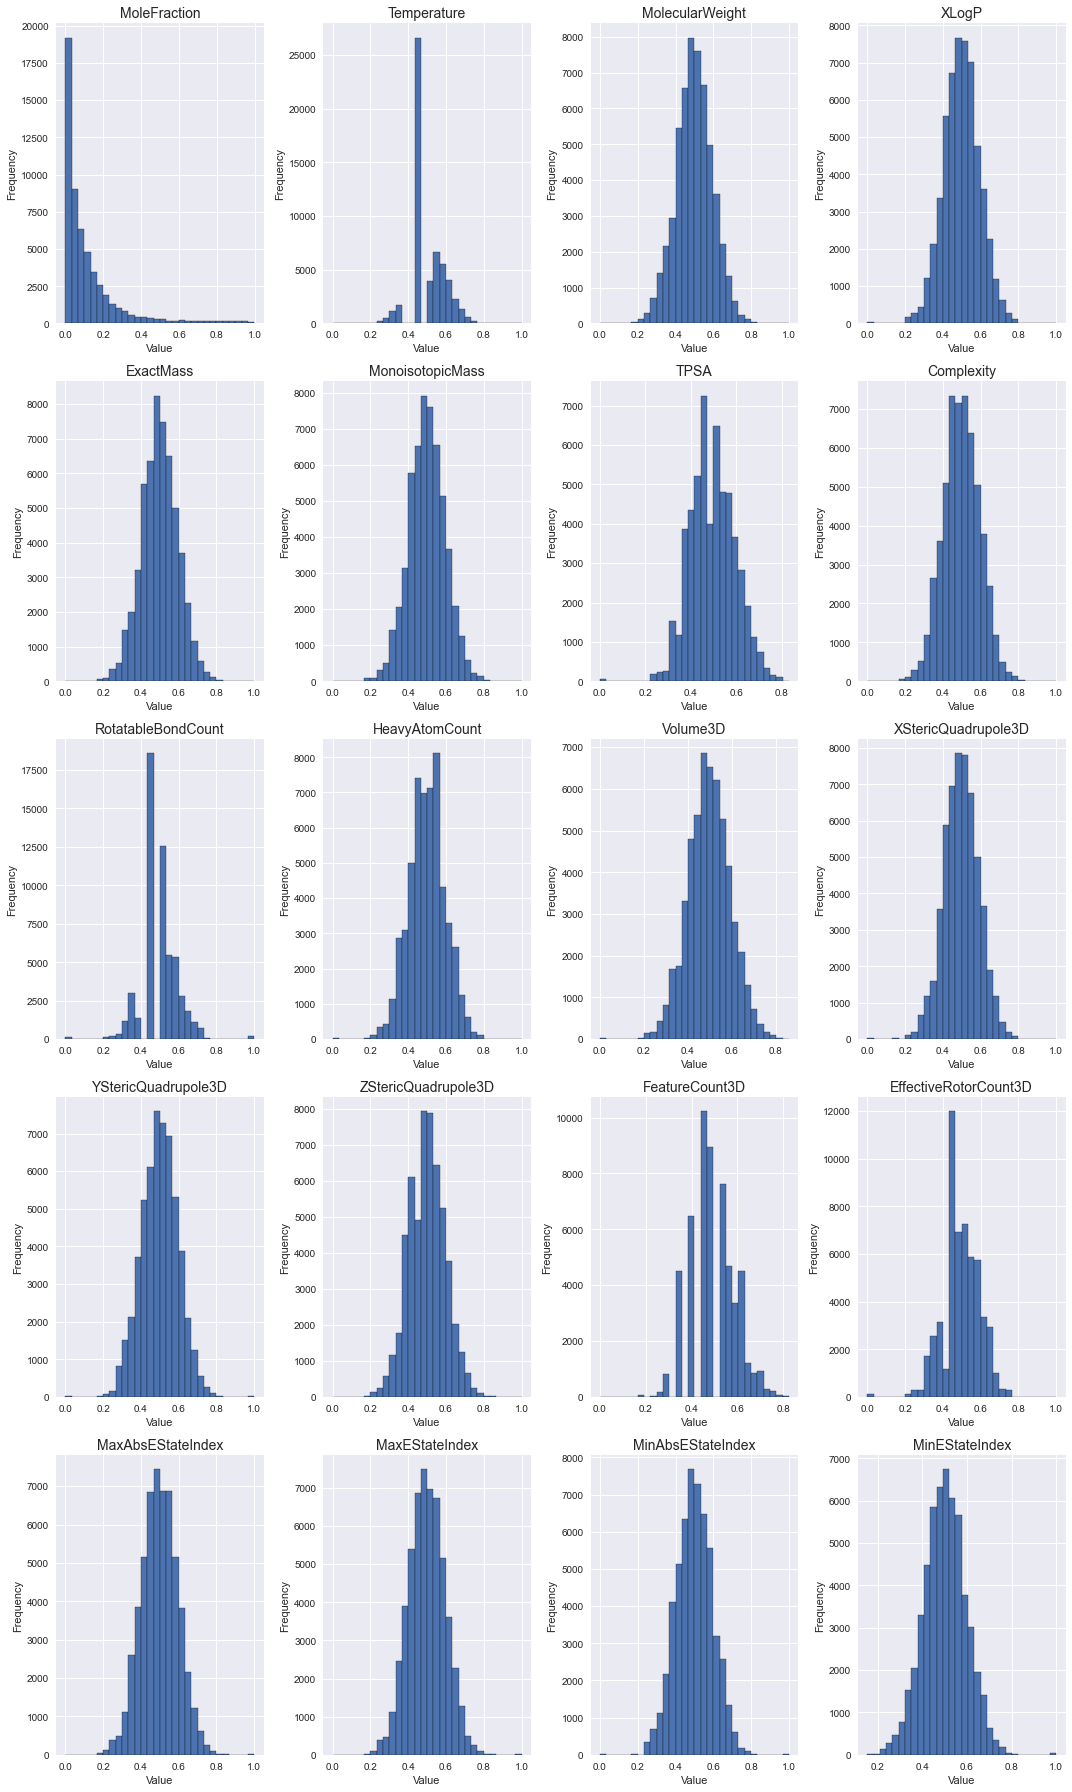

: 

In [19]:
import matplotlib.pyplot as plt

def plot_hists(dataset, num_features):
    plt.style.use('seaborn-v0_8')
    for feature_window in range(0, len(dataset.columns), num_features):
        features_to_plot = dataset.iloc[:, feature_window:(feature_window) + num_features]
        n_rows = 5
        n_cols = 4

        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
        axes = axes.flatten()

        for idx, feature in enumerate(features_to_plot.columns):
            if idx >= len(axes):
                break
            ax = axes[idx]
            ax.hist(features_to_plot[feature].dropna(), bins=30, edgecolor='black')
            ax.set_title(f'{feature}', fontsize=14)
            ax.set_xlabel('Value')
            ax.set_ylabel('Frequency')
            ax.grid(True)

        plt.tight_layout()
        plt.show()

plot_hists(dataset.iloc[:, 4:], dataset.iloc[:, 4:].shape[1])

In [19]:
'''
# To multiply temperatures with all other features
def multiply_row(row):
    return row[0] * row[1:]
X_weighted = X.apply(multiply_row, axis=1, result_type='expand')

new_dataset = pd.concat([dataset.iloc[:, :5], X_weighted], axis=1)
new_dataset.to_csv("MLPtrain_temp.csv", index=False)
'''

,Temperature,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,HeavyAtomCount,Volume3D,XStericQuadrupole3D,...,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Kappa1,Kappa2,LabuteASA,MolLogP,MolMR
0,0.050300,0.342889,0.488599,0.342768,0.340772,0.306361,0.145659,0.27,0.449071,0.416159,...,0.220482,0.317218,0.178487,0.241140,0.752456,0.310202,0.743768,0.315426,0.490036,0.299132
1,0.060435,0.342889,0.488599,0.342768,0.340772,0.306361,0.145659,0.27,0.449071,0.416159,...,0.220482,0.317218,0.178487,0.241140,0.752456,0.310202,0.743768,0.315426,0.490036,0.299132
2,0.069069,0.342889,0.488599,0.342768,0.340772,0.306361,0.145659,0.27,0.449071,0.416159,...,0.220482,0.317218,0.178487,0.241140,0.752456,0.310202,0.743768,0.315426,0.490036,0.299132
3,0.073574,0.342889,0.488599,0.342768,0.340772,0.306361,0.145659,0.27,0.449071,0.416159,...,0.220482,0.317218,0.178487,0.241140,0.752456,0.310202,0.743768,0.315426,0.490036,0.299132
4,0.077327,0.342889,0.488599,0.342768,0.340772,0.306361,0.145659,0.27,0.449071,0.416159,...,0.220482,0.317218,0.178487,0.241140,0.752456,0.310202,0.743768,0.315426,0.490036,0.299132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.059685,0.213944,0.322476,0.214025,0.212623,0.340228,0.138564,0.20,0.292462,0.341015,...,0.218020,0.218020,0.212406,0.212406,0.533399,0.168281,0.356298,0.200033,0.306903,0.215881
13481,0.059685,0.221041,0.328990,0.221400,0.220034,0.357760,0.134808,0.22,0.329004,0.418190,...,0.207292,0.188585,0.186981,0.169846,0.500982,0.210674,0.413887,0.214264,0.308644,0.235037
13482,0.059685,0.273861,0.442997,0.273917,0.272808,0.319334,0.153172,0.27,0.408709,0.427903,...,0.273077,0.273077,0.245434,0.245434,0.533399,0.252280,0.430968,0.274758,0.421974,0.294576
13483,0.057808,0.256739,0.416938,0.256805,0.255612,0.319334,0.149833,0.25,0.375987,0.424371,...,0.273077,0.273077,0.245434,0.245434,0.533399,0.228281,0.427364,0.253560,0.392057,0.272265


'\n# To multiply temperatures with all other features\ndef multiply_row(row):\n    return row[0] * row[1:]\nX_weighted = X.apply(multiply_row, axis=1, result_type=\'expand\')\n\nnew_dataset = pd.concat([dataset.iloc[:, :5], X_weighted], axis=1)\nnew_dataset.to_csv("MLPtrain_temp.csv", index=False)\n'

In [3]:
import numpy as np
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from tqdm import tqdm

kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0, 1000))

component_range = range(1, (X.shape[1] + 1), 5)  # This will test from 1 component up to the max number of features. Adjust as needed.

avg_rmse_list = []; max_rmse_list = []; min_rmse_list = []
avg_r2_list = []; max_r2_list = []; min_r2_list = []
components = []
true_values_all = []; predicted_values_all = []

trained_rfs = {}
trained_pcas_rf = {}

for n_components in component_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    trained_pcas_rf[n_components] = pca
    
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in tqdm(kf.split(X_pca), total=kf.get_n_splits(), desc=f"KFold iteration for {n_components} PCA components"):
        X_train, X_test = X_pca[train_index], X_pca[test_index]
        y_train, y_test = y[train_index], y[test_index]

        rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
        rf.fit(X_train, y_train)
        trained_rfs[n_components] = rf

        y_pred = rf.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

        true_values_all.append(y_test.values)
        predicted_values_all.append(y_pred)

    avg_rmse = np.mean(rmse_scores)
    max_rmse = np.max(rmse_scores)
    min_rmse = np.min(rmse_scores)
    avg_r2 = np.mean(r2_scores)
    max_r2 = np.max(r2_scores)
    min_r2 = np.min(r2_scores)

    print(f"Number of PCA Components: {n_components}")
    print(f"Average RMSE over {kf.get_n_splits()} folds: {avg_rmse}")
    print(f"Average R^2 score over {kf.get_n_splits()} folds: {avg_r2}")
    print("-" * 50)

    avg_rmse_list.append(avg_rmse)
    max_rmse_list.append(max_rmse)
    min_rmse_list.append(min_rmse)
    avg_r2_list.append(avg_r2)
    max_r2_list.append(max_r2)
    min_r2_list.append(min_r2)

    components.append(n_components)

KFold iteration for 1 PCA components: 100%|██████████| 5/5 [00:07<00:00,  1.59s/it]


Number of PCA Components: 1
Average RMSE over 5 folds: 0.16617730680940151
Average R^2 score over 5 folds: 0.01606174248177943
--------------------------------------------------


KFold iteration for 6 PCA components: 100%|██████████| 5/5 [00:33<00:00,  6.73s/it]


Number of PCA Components: 6
Average RMSE over 5 folds: 0.1659449781323304
Average R^2 score over 5 folds: 0.018807486820154474
--------------------------------------------------


KFold iteration for 11 PCA components: 100%|██████████| 5/5 [01:09<00:00, 13.85s/it]


Number of PCA Components: 11
Average RMSE over 5 folds: 0.16595264270920076
Average R^2 score over 5 folds: 0.018716683484385377
--------------------------------------------------


KFold iteration for 16 PCA components:  40%|████      | 2/5 [00:48<01:12, 24.12s/it]


KeyboardInterrupt: 

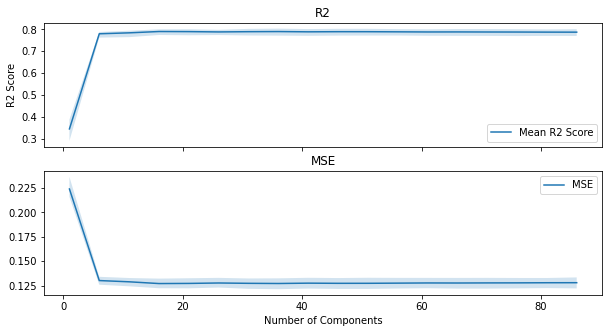

In [26]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex = True, figsize = (10, 5))
ax1.plot(components, avg_r2_list, label = "Mean R2 Score")
ax1.set_ylabel("R2 Score")
ax1.fill_between(components, max_r2_list, min_r2_list, alpha = 0.2)
ax1.legend()
ax1.set_title("R2")

ax2.plot(components, avg_rmse_list, label = "MSE")
plt.xlabel("Number of Components")
ax2.set_title("MSE")
ax2.fill_between(components, max_rmse_list, min_rmse_list, alpha = 0.2)
ax2.legend()

plt.show()

In [28]:
from sklearn.linear_model import LinearRegression

test_dataset = pd.read_csv("C:/Users/dannt/Documents/GitHub/PSDI-miscibility2/Datasets/TrainTestData/NoDragon/QuantileMinMaxTest.csv")
X = test_dataset.iloc[:, 7:]
y = test_dataset['MoleFraction']

for input_dim_value in component_range:
    # Apply PCA transformation on test data (use the PCA object from the training phase)
    pca = trained_pcas_rf[input_dim_value]
    X_pca_test = pca.transform(X)

    # Retrieve the corresponding trained random forest model
    rf_model = trained_rfs[input_dim_value]

    predictions = rf_model.predict(X_pca_test)

    # Fit a linear regression to the scatter plot
    linreg = LinearRegression().fit(y.values.reshape(-1, 1), predictions)
    slope = linreg.coef_[0]
    intercept = linreg.intercept_

    mse = mean_squared_error(y, predictions)

    # Compute the residuals
    residuals = predictions - y.values

    # Sum of squared residuals
    SS_res = np.sum(residuals**2)
    SS_tot = np.sum((y.values - y.values.mean())**2)
    r2 = 1 - (SS_res / SS_tot)

    print(f"PCA {input_dim_value} --> R^2: {r2}, MSE: {mse}")

PCA 1 --> R^2: 0.06499524849693661, MSE: 0.08550631900240943
PCA 6 --> R^2: 0.5092258426342342, MSE: 0.04488136727690027
PCA 11 --> R^2: 0.5220507339270155, MSE: 0.04370852912362999
PCA 16 --> R^2: 0.5813367461215562, MSE: 0.03828681478160345
PCA 21 --> R^2: 0.5559547870563954, MSE: 0.04060799858868341
PCA 26 --> R^2: 0.5515914011207019, MSE: 0.04100703086006841
PCA 31 --> R^2: 0.5753666510774146, MSE: 0.03883278083204164
PCA 36 --> R^2: 0.5790704627486634, MSE: 0.03849406672200366
PCA 41 --> R^2: 0.5821649858909722, MSE: 0.038211072135568416
PCA 46 --> R^2: 0.5768599273390268, MSE: 0.03869622050314612
PCA 51 --> R^2: 0.5786860552149793, MSE: 0.03852922084624664
PCA 56 --> R^2: 0.5735854759826098, MSE: 0.0389956695506398
PCA 61 --> R^2: 0.5732012466272992, MSE: 0.039030807380444905
PCA 66 --> R^2: 0.5583651234566189, MSE: 0.04038757297821532
PCA 71 --> R^2: 0.5683021434856703, MSE: 0.03947883106736245
PCA 76 --> R^2: 0.5699030605190424, MSE: 0.03933242697440801
PCA 81 --> R^2: 0.577655

IndexError: index 25 is out of bounds for axis 0 with size 25

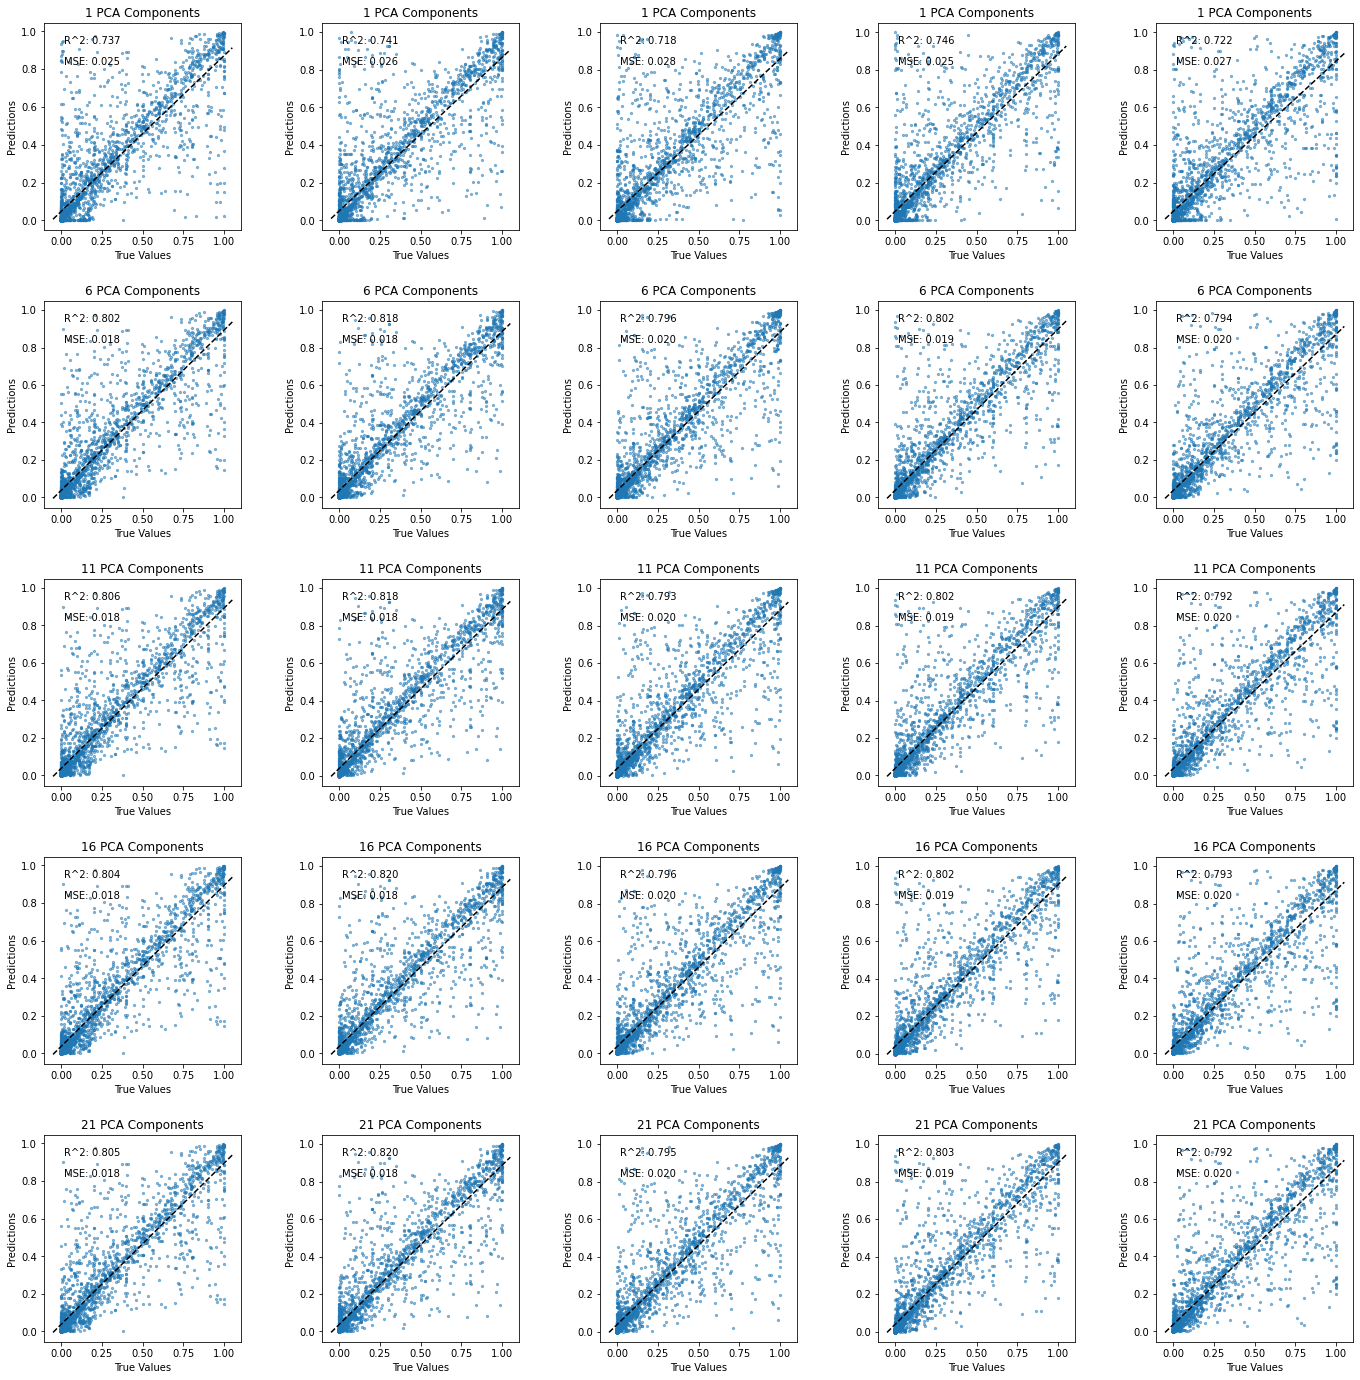

In [6]:
from sklearn.linear_model import LinearRegression

fig, axes = plt.subplots(5, 5, figsize=(20, 20))
fig.tight_layout(pad=5.0)
axes = axes.ravel()

for idx, (true_values, predicted_values) in enumerate(zip(true_values_all, predicted_values_all)):
    mse = mean_squared_error(true_values, predicted_values) # Compute MSE
    axes[idx].scatter(true_values, predicted_values, alpha=0.5, s=5)

    lin_reg = LinearRegression().fit(true_values.reshape(-1, 1), predicted_values)
    y_vals = np.array(axes[idx].get_xlim())
    x_vals = y_vals * lin_reg.coef_ + lin_reg.intercept_
    axes[idx].plot(y_vals, x_vals, '--', color='black')

    r2 = lin_reg.score(true_values.reshape(-1, 1), predicted_values)
    axes[idx].text(0.1, 0.9, f'R^2: {r2:.3f}', transform=axes[idx].transAxes)
    axes[idx].text(0.1, 0.8, f'MSE: {mse:.3f}', transform=axes[idx].transAxes)

    n_components = components[idx // kf.get_n_splits()]  # idx // kf.get_n_splits() gives the PCA component number
    axes[idx].set_title(f'{n_components} PCA Components')
    axes[idx].set_xlabel('True Values')
    axes[idx].set_ylabel('Predictions')

plt.show()

In [8]:
# Train a model with the whole dataset here
import pandas as pd
test_dataset = pd.read_csv("C:/Users/dannt/Documents/GitHub/PSDI-miscibility2/Datasets/TrainTestData/LinearMF/WithoutDragon/Test_LinearMF_MM.csv")
test_dataset.head()

,Compound1,Compound2,SMILES1,SMILES2,MinTemp,MaxTemp,MoleFraction,Temperature,MolecularWeight,XLogP,...,NOCount,NumHAcceptors,NumHeteroatoms,NumRotatableBonds,RingCount,MolLogP,MolMR,MW,AMW,Sv
0,carbazole,2-propanol,C1=CC=C2C(=C1)C3=CC=CC=C3N2,CC(C)O,20.00,60.00,0.00912,0.369676,0.271803,0.521739,...,0.370370,0.250000,0.322581,0.464286,0.333333,0.567504,0.393075,6.041920,4.141657,3.534037
1,carbazole,1-butanol,C1=CC=C2C(=C1)C3=CC=CC=C3N2,CCCCO,25.00,25.00,0.00444,0.272626,0.259330,0.492754,...,0.370370,0.250000,0.322581,0.392857,0.333333,0.546401,0.375402,6.008002,4.142706,3.488445
2,carbazole,phenol,C1=CC=C2C(=C1)C3=CC=CC=C3N2,C1=CC=C(C=C1)O,40.00,40.00,0.00598,0.314219,0.241545,0.463768,...,0.370370,0.250000,0.322581,0.464286,0.250000,0.513353,0.352114,5.957623,4.105548,3.459120
3,carbazole,2-propanone,C1=CC=C2C(=C1)C3=CC=CC=C3N2,CC(=O)C,20.00,20.00,0.02390,0.258762,0.273600,0.541063,...,0.370370,0.250000,0.322581,0.464286,0.333333,0.556287,0.396883,6.046710,4.128859,3.549301
4,dibenzofuran,thiophene,C1=CC=C2C(=C1)C3=CC=CC=C3O2,C1=CSC=C1,41.05,67.95,0.42200,0.317131,0.251287,0.468599,...,0.407407,0.291667,0.322581,0.464286,0.250000,0.508450,0.358602,5.985547,4.077114,3.512619


In [9]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

pca = PCA(n_components=60)
X_train = pca.fit_transform(X)
y_train = y

# Process your test dataset
X_test = pca.transform(test_dataset.iloc[:, 7:])  
y_test = test_dataset['MoleFraction']

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
y_preds = y_pred

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

np.savetxt("MTTLD.txt", y_preds.reshape(1, -1), delimiter=",", fmt="%s")


RMSE: 0.2657716588523853
R^2: 0.22761658216756087


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


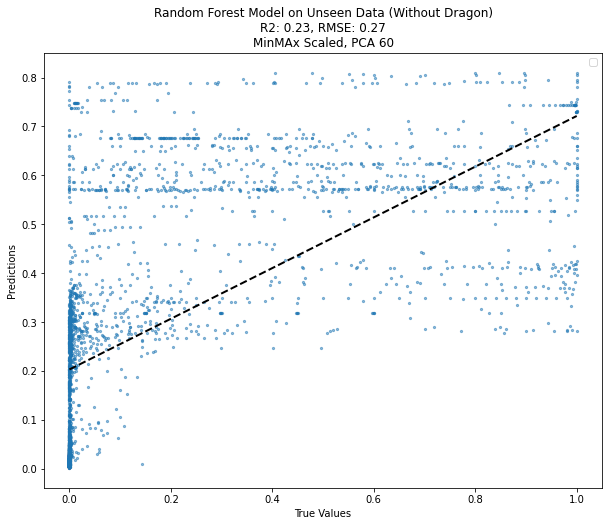

In [10]:
import numpy as np
import matplotlib.pyplot as plt

slope, intercept = np.polyfit(y_test, y_pred, 1)
x_vals = np.linspace(np.min(y_test), np.max(y_test), 100)
y_vals = slope * x_vals + intercept

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, s=5)
plt.plot(x_vals, y_vals, '--k', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Random Forest Model on Unseen Data (Without Dragon)\nR2: {r2:.2f}, RMSE: {rmse:.2f}\nMinMAx Scaled, PCA 60')
plt.legend()
# plt.grid(True)
plt.show()
